In [ ]:
#%% Imports and Setup 

import numpy as np
import sympy as sp
from sympy import Matrix, cos, sin, simplify, atan2, pi, symbols
import matplotlib.pyplot as plt
from math import radians, degrees

# Import our robotics library functions
from robotics_lib import *
# Define symbolic variables
q1, q2, q3, q4 = symbols('q1 q2 q3 q4', real=True)
l1, l2, l3 = symbols('l1 l2 l3', real=True)
alpha, beta, gamma = symbols('alpha beta gamma', real=True)
t, T = symbols('t T', real=True)

def S(v):
    """Create skew-symmetric matrix"""
    return Matrix([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

In [ ]:
#%% YXZ Euler Rotation

R_yxz = euler_rotation('yxz', [alpha, beta, gamma])
R_yxz

Matrix([
[ sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha), sin(alpha)*cos(beta)],
[                                    sin(gamma)*cos(beta),                                    cos(beta)*cos(gamma),           -sin(beta)],
[-sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma), cos(alpha)*cos(beta)]])

In [ ]:
#%% Substitute values and calculate WR_B

R = R_yxz.subs({
    alpha: radians(180),
    beta: radians(-60),
    gamma: radians(90)
})
WR_B = R

# Display both matrices
('R =', R, 'WR_B =', WR_B)

('R =',
 Matrix([
 [-1.67289863829858e-16,                  1.0, 6.12323399573677e-17],
 [                  0.5, 3.06161699786838e-17,    0.866025403784439],
 [    0.866025403784439, 1.75493441850981e-16,                 -0.5]]),
 'WR_B =',
 Matrix([
 [-1.67289863829858e-16,                  1.0, 6.12323399573677e-17],
 [                  0.5, 3.06161699786838e-17,    0.866025403784439],
 [    0.866025403784439, 1.75493441850981e-16,                 -0.5]]))

In [ ]:
#%% Angular velocity

BV_B = Matrix([1, -1, 0])
WR_B_dot = S(WR_B * BV_B) * WR_B

('BV_B =', BV_B, 'WR_B_dot =', WR_B_dot)

('BV_B =',
 Matrix([
 [ 1],
 [-1],
 [ 0]]),
 'WR_B_dot =',
 Matrix([
 [1.11022302462516e-16, 6.12323399573677e-17,               -1.0],
 [   0.866025403784439,    0.866025403784439,               -0.5],
 [                -0.5,                 -0.5, -0.866025403784439]]))

In [ ]:
#%% First Robot Configuration - DH Parameters

alpha = [-pi/2, -pi/2, 0]
a = [-l1, -l2, -l3]
d = [symbols('l0'), 0, 0]
theta = [q1, q2, q3]

table = Matrix([
    [alpha[0], a[0], d[0], theta[0]],
    [alpha[1], a[1], d[1], theta[1]],
    [alpha[2], a[2], d[2], theta[2]]
])

('DH Parameters:', table)

('DH Parameters:',
 Matrix([
 [-pi/2, -l1, l0, q1],
 [-pi/2, -l2,  0, q2],
 [    0, -l3,  0, q3]]))

In [ ]:
#%% Calculate transformations

T, A = dh_matrix(table)

('A0_1 =', A[0], 
 'A1_2 =', A[1], 
 'A2_3 =', A[2], 
 'T =', T)

('A0_1 =',
 Matrix([
 [cos(q1),  0, -sin(q1), -l1*cos(q1)],
 [sin(q1),  0,  cos(q1), -l1*sin(q1)],
 [      0, -1,        0,          l0],
 [      0,  0,        0,           1]]),
 'A1_2 =',
 Matrix([
 [cos(q2),  0, -sin(q2), -l2*cos(q2)],
 [sin(q2),  0,  cos(q2), -l2*sin(q2)],
 [      0, -1,        0,           0],
 [      0,  0,        0,           1]]),
 'A2_3 =',
 Matrix([
 [cos(q3), -sin(q3), 0, -l3*cos(q3)],
 [sin(q3),  cos(q3), 0, -l3*sin(q3)],
 [      0,        0, 1,           0],
 [      0,        0, 0,           1]]),
 'T =',
 Matrix([
 [sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3),  sin(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2), -sin(q2)*cos(q1), -l1*cos(q1) - l2*cos(q1)*cos(q2) - l3*sin(q1)*sin(q3) - l3*cos(q1)*cos(q2)*cos(q3)],
 [sin(q1)*cos(q2)*cos(q3) - sin(q3)*cos(q1), -sin(q1)*sin(q3)*cos(q2) - cos(q1)*cos(q3), -sin(q1)*sin(q2), -l1*sin(q1) - l2*sin(q1)*cos(q2) - l3*sin(q1)*cos(q2)*cos(q3) + l3*sin(q3)*cos(q1)],
 [                         -sin(q2)*cos(q3),                     

In [ ]:
#%% Forward kinematics

f_r_3D = get_f_r(T)
f_r = Matrix([f_r_3D[0], f_r_3D[1], f_r_3D[2]])

('f_r_3D =', f_r_3D, 'f_r =', f_r)

('f_r_3D =',
 Matrix([
 [-l1*cos(q1) - l2*cos(q1)*cos(q2) - l3*sin(q1)*sin(q3) - l3*cos(q1)*cos(q2)*cos(q3)],
 [-l1*sin(q1) - l2*sin(q1)*cos(q2) - l3*sin(q1)*cos(q2)*cos(q3) + l3*sin(q3)*cos(q1)],
 [                                              l0 + l2*sin(q2) + l3*sin(q2)*cos(q3)],
 [                                                                      q1 + q2 + q3]]),
 'f_r =',
 Matrix([
 [-l1*cos(q1) - l2*cos(q1)*cos(q2) - l3*sin(q1)*sin(q3) - l3*cos(q1)*cos(q2)*cos(q3)],
 [-l1*sin(q1) - l2*sin(q1)*cos(q2) - l3*sin(q1)*cos(q2)*cos(q3) + l3*sin(q3)*cos(q1)],
 [                                              l0 + l2*sin(q2) + l3*sin(q2)*cos(q3)]]))

In [ ]:
#%% Second Robot Configuration

alpha2 = [0, -pi/2, pi/2, 0]
a2 = [l1, 0, 0, l2]
d2 = [0, 0, q3, 0]
theta2 = [q1, q2-pi/2, 0, q4+pi/2]

table2 = Matrix([
    [alpha2[0], a2[0], d2[0], theta2[0]],
    [alpha2[1], a2[1], d2[1], theta2[1]],
    [alpha2[2], a2[2], d2[2], theta2[2]],
    [alpha2[3], a2[3], d2[3], theta2[3]]
])

('Second Robot DH Parameters:', table2)

('Second Robot DH Parameters:',
 Matrix([
 [    0, l1,  0,        q1],
 [-pi/2,  0,  0, q2 - pi/2],
 [ pi/2,  0, q3,         0],
 [    0, l2,  0, q4 + pi/2]]))

In [ ]:
#%% Second Robot Forward Kinematics and Jacobian

T2, A2 = dh_matrix(table2)
f_r_3D2 = get_f_r(T2)
f_r2 = Matrix([f_r_3D2[0], f_r_3D2[1], f_r_3D2[3]])  # Using alpha_z instead of z
j = simplify(f_r2.jacobian([q1, q2, q3, q4]))

('T2 =', T2,
 'f_r2 =', f_r2,
 'Jacobian =', j)

('T2 =',
 Matrix([
 [cos(q1 + q2 + q4), -sin(q1 + q2 + q4), 0, l1*cos(q1) + l2*cos(q1 + q2 + q4) + q3*cos(q1 + q2)],
 [sin(q1 + q2 + q4),  cos(q1 + q2 + q4), 0, l1*sin(q1) + l2*sin(q1 + q2 + q4) + q3*sin(q1 + q2)],
 [                0,                  0, 1,                                                   0],
 [                0,                  0, 0,                                                   1]]),
 'f_r2 =',
 Matrix([
 [l1*cos(q1) + l2*cos(q1 + q2 + q4) + q3*cos(q1 + q2)],
 [l1*sin(q1) + l2*sin(q1 + q2 + q4) + q3*sin(q1 + q2)],
 [                                       q1 + q2 + q4]]),
 'Jacobian =',
 Matrix([
 [-l1*sin(q1) - l2*sin(q1 + q2 + q4) - q3*sin(q1 + q2), -l2*sin(q1 + q2 + q4) - q3*sin(q1 + q2), cos(q1 + q2), -l2*sin(q1 + q2 + q4)],
 [ l1*cos(q1) + l2*cos(q1 + q2 + q4) + q3*cos(q1 + q2),  l2*cos(q1 + q2 + q4) + q3*cos(q1 + q2), sin(q1 + q2),  l2*cos(q1 + q2 + q4)],
 [                                                   1,                                       1,     

In [ ]:
#%% Planar 2R Robot

l1_val = 1.0
l2_val = 1.0

def planar_2R_kinematics(q1, q2, l1=l1_val, l2=l2_val):
    r = Matrix([
        l1*cos(q1) + l2*cos(q1+q2),
        l1*sin(q1) + l2*sin(q1+q2)
    ])
    J = r.jacobian([q1, q2])
    return r, J

r, J = planar_2R_kinematics(q1, q2)
('r =', r, 'J =', J)

('r =',
 Matrix([
 [1.0*cos(q1) + 1.0*cos(q1 + q2)],
 [1.0*sin(q1) + 1.0*sin(q1 + q2)]]),
 'J =',
 Matrix([
 [-1.0*sin(q1) - 1.0*sin(q1 + q2), -1.0*sin(q1 + q2)],
 [ 1.0*cos(q1) + 1.0*cos(q1 + q2),  1.0*cos(q1 + q2)]]))

In [ ]:
#%% Test configurations

qa = Matrix([3*pi/4, -pi/2])
qb = Matrix([pi/2, -pi/2])
FA = (10/np.sqrt(2))*Matrix([1, 1])

J_qa = J.subs({q1: qa[0], q2: qa[1]})
tau_a = J_qa.transpose() * FA

FB = (10/np.sqrt(2))*Matrix([-1, -1])
J_qb = J.subs({q1: qb[0], q2: qb[1]})
tau_b = -J_qb.transpose() * FB

('tau_a =', tau_a, 'tau_b =', tau_b)

('tau_a =',
 Matrix([
 [-7.07106781186547*sqrt(2)],
 [                        0]]),
 'tau_b =',
 Matrix([
 [               0],
 [7.07106781186547]]))

In [ ]:
#%% Trajectory Generation

def cubic_polynomial(t, T, qi, qf, vi, vf):
    """Generate cubic polynomial trajectory"""
    Dq = qf - qi
    
    # Calculate coefficients
    a = (T*vf + T*vi - 2*Dq)/Dq
    b = (3*Dq - 2*T*vi - T*vf)/Dq
    c = T*vi/Dq
    d = 0
    
    # Normalized time
    tau = t/T
    
    # Generate trajectory
    q = qi + Dq*(a*tau**3 + b*tau**2 + c*tau + d)
    return q

In [ ]:
#%% Joint 1 trajectory coefficients

T_val = 2
qi = pi
qf = 1.4805
vi = 0
vf = -0.7185
Dq = qf - qi

a1 = (T_val*vf + T_val*vi - 2*Dq)/Dq
b1 = (3*Dq - 2*T_val*vi - T_val*vf)/Dq
c1 = T_val*vi/Dq
d1 = 0

('Joint 1 coefficients:',
 f'a = {a1:.4f}',
 f'b = {b1:.4f}',
 f'c = {c1:.4f}',
 f'd = {d1:.4f}')

('Joint 1 coefficients:',
 'a = -1.1349',
 'b = 2.1349',
 'c = 0.0000',
 'd = 0.0000')

In [ ]:
#%% Joint 2 coefficients

qi = 0
qf = -2.3016
vi = 0
vf = 0.4601
Dq = qf - qi

a2 = (T_val*vf + T_val*vi - 2*Dq)/Dq
b2 = (3*Dq - 2*T_val*vi - T_val*vf)/Dq
c2 = T_val*vi/Dq
d2 = 0

('Joint 2 coefficients:',
 f'a = {a2:.4f}',
 f'b = {b2:.4f}',
 f'c = {c2:.4f}',
 f'd = {d2:.4f}')

('Joint 2 coefficients:',
 'a = -2.3998',
 'b = 3.3998',
 'c = -0.0000',
 'd = 0.0000')

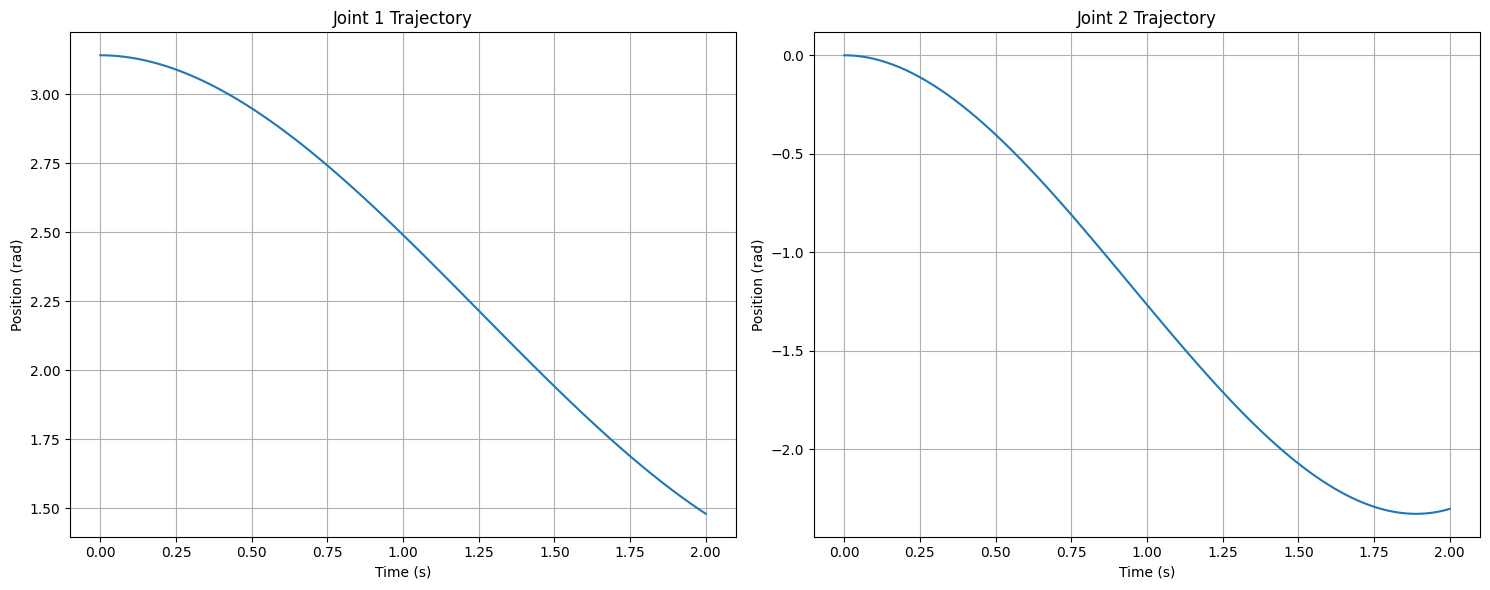

In [ ]:
#%% Generate and plot trajectories

t_vals = np.linspace(0, 2, 100)
q_traj1 = [cubic_polynomial(t, 2, pi, 1.4805, 0, -0.7185) for t in t_vals]
q_traj2 = [cubic_polynomial(t, 2, 0, -2.3016, 0, 0.4601) for t in t_vals]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(t_vals, q_traj1)
ax1.set_title('Joint 1 Trajectory')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (rad)')
ax1.grid(True)

ax2.plot(t_vals, q_traj2)
ax2.set_title('Joint 2 Trajectory')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (rad)')
ax2.grid(True)

plt.tight_layout()
plt.show()